In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 0. 사이킷런(Scikit-Learn) 더 잘 이해하기

사이킷런(scikit-learn)은 파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리 입니다. 

사이킷런 패키지 내의 모듈명은 sklearn으로 시작하는 명명규칙이 있습니다.

● sklearn.datasets 내의 모듈은 
- 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈의 모임입니다.
- (ex) from sklearn.datasets import load_iris

● sklearn.tree 내의 모듈은 
- 트리 기반 ML 알고리즘을 구현한 클래스의 모임입니다.
- (ex) from sklearn.tree import DecisionTreeClassifier

● sklearn.model_selection은 
- 학습 데이터와 검증 데이터, 예측데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임입니다.
- 하이퍼 파라미터란 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하는 파라미터들을 통칭하며, 하이퍼 파라미터를 통해 머신러닝 알고리즘의 성능을 튜닝할 수 있습니다.
- (ex) from sklearn.model_selection import train_test_split



(그 외)

● sklearn.metrics 
- 분류, 회귀, 클러스터링에 대한 다양한 성능 측정 방법 제공
- Accurcay, Precision, Recall, ROC-AUC, RMSE 등 제공

● sklearn.linear_model
- 주로 선형 회귀, 릿지(Ridge), 라쏘(Rasso) 및 로지스틱 회귀 등 회귀 관련 알고리즘을 지원.

(등등등...)

# 1. Confusion matrix & metrics

In [2]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## (1) 데이터 준비

In [3]:
# classification 위한 임의의 데이터 생성 -> X: 2개 feature, y:binary 인 데이터 샘플 100개
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)

참고사이트: https://datascienceschool.net/view-notebook/ec26c797cec646e295d737c522733b15/

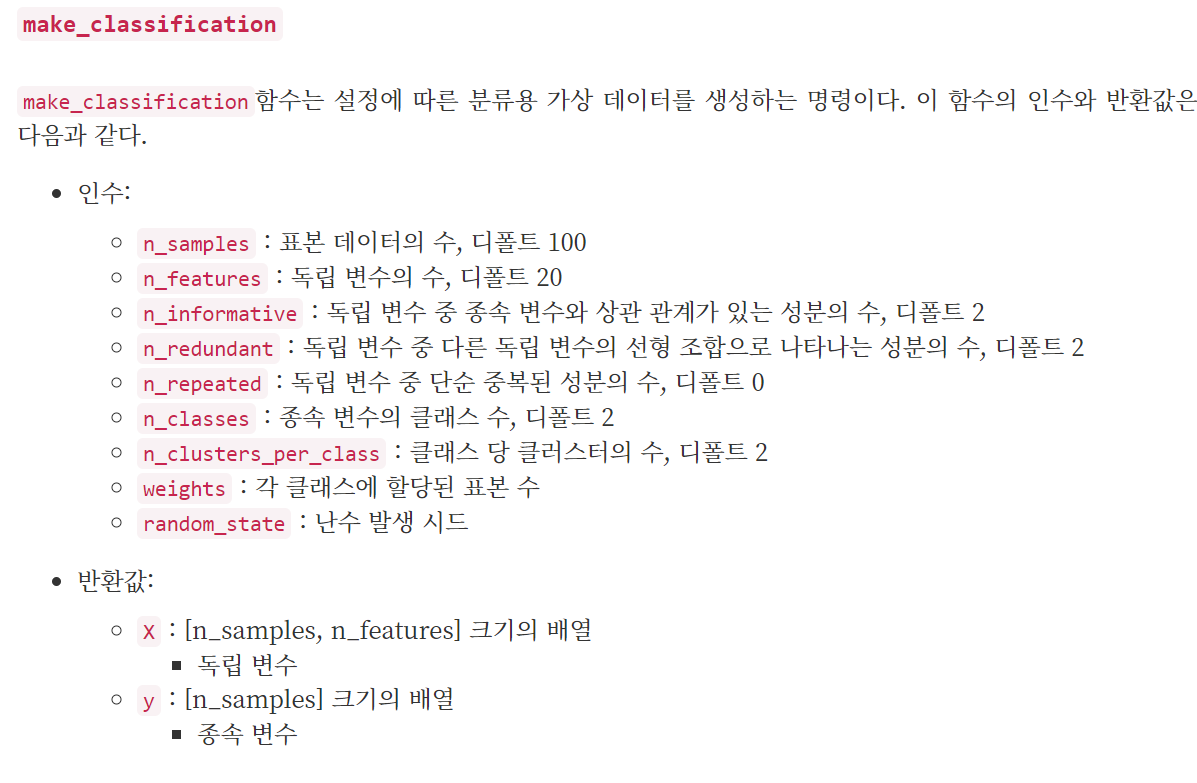

In [4]:
model = LogisticRegression().fit(X,y)
#(X,y)데이터를 기반으로 로지스틱회귀모델을 학습함.

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [5]:
#!!! 바로 위와 같은 의미의 코드!!!#

lr = LogisticRegression() #LogisticRegression 객체 생성
model = lr.fit(X,y) # 학습 수행

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


- 사이킷런은 ML 모델 학습을 위해서 fit()을, 학습된 모델의 예측을 위해 predict() 메서드를 제공합니다. 

- 지도학습의 주요 두 축인 분류(Classification)와 회귀(Regression)의 다양한 알고리즘을 구현한 모든 사이킷런 클래스는 fit()과 predict()만을 이용해 간단하게 학습과 예측 결과를 반환합니다. 

- 사이킷런에서는 분류 알고리즘을 구현한 클래스를 Classifier로, 그리고 회귀 알고리즘을 구현한 클래스를 Regressor로 지칭합니다. 

- 이들 Classifier와 Regressor를 합쳐서 Estimator라고 부릅니다. 

- 당연히 Estimator 클래스는 fit()과 predict()를 내부에서 구현하고 있습니다.

(더 나아가,)

- cross_val_score()와 같은 evalution 함수, GridSearchCV와 같은 하이퍼 파라미터 튜닝을 지원하는 클래스의 경우 이 Estimator를 인자로 받습니다. 

- 인자로 받은 Estimator에 대해서 cross_val_score(), GridSearchCV.fit() 함수 내에서 이 Estimator의 fit()과 predict()를 호출해서 평가하거나 하이퍼 파라미터 튜닝을 수행하는 것입니다. 

In [6]:
y_score = model.decision_function(X)  
y_pred = model.predict(X)

# decision_function(): 판별함수 결과값 계산
# predict(): y_score가 양수이면 y=1, 음수이면 y=0으로 분류

LogisticRegression 모델에서의 decision function, predict 함수의 구체적인 원리가 궁금한 사람은 읽어보기!
- https://stats.stackexchange.com/questions/329857/what-is-the-difference-between-decision-function-predict-proba-and-predict-fun

In [7]:
y

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [8]:
y_score

array([  2.95031529,  -4.89558649,   2.11889926,  -2.72811904,
        -2.66509794,  -2.62823273,   4.79928625,   1.49866762,
        -2.8916992 ,   4.99295594,  -2.67702809,   1.73131861,
       -10.20129856,   4.05025631,  -1.74536011,  -5.12110942,
        -4.00692828,  -2.69670834,   2.92185442,   4.6048501 ,
         3.03286779,  -5.5174609 ,   0.01265956,   8.71670441,
         3.39082562,   6.41956457,   5.2825015 ,  -4.4420443 ,
         4.34480477,  -2.60302826,   4.4537753 ,  -2.18871472,
         2.3844126 ,  -2.65120122,   4.21741646,  -2.65461468,
         3.3685877 ,  -2.55175282,  -2.70762097,  -2.75549789,
        -2.73832895,  -2.68837765,   6.38572711,   4.27941435,
        -2.64617077,   4.64628167,   3.09778332,  -2.73059295,
         5.40129805,  -2.71240423,  -4.44430352,   5.33234809,
        -1.76919672,  -0.59938159,  -0.25271885,   6.68658806,
        -7.36445697,  -2.73279917,   3.42072679,  -2.65168842,
         2.50491364,  -2.61659596,  -8.40275449,  -8.71

In [9]:
y_pred

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [10]:
# 데이터프레임 형태로 확인해 보자

df = pd.DataFrame(np.vstack([y_score, y_pred, y]).T,columns=["y_score", "y_pred", "y"])
#np.vstack(): 배열을 위에서 아래로 붙이기
#np.vstack().T: transpose 취해준 것

In [11]:
df.head()

,y_score,y_pred,y
0,2.950315,1.0,1.0
1,-4.895586,0.0,0.0
2,2.118899,1.0,1.0
3,-2.728119,0.0,0.0
4,-2.665098,0.0,0.0


In [12]:
df = df.sort_values("y_score", ascending=False)

In [13]:
df.head() # 이렇게만 하면 index 순서가 엉망이 되는구나

,y_score,y_pred,y
23,8.716704,1.0,1.0
72,8.203545,1.0,1.0
73,7.485996,1.0,1.0
55,6.686588,1.0,1.0
25,6.419565,1.0,1.0


In [14]:
df = df.sort_values("y_score", ascending=False).reset_index(drop=True) # reset_index(drop=True)를 이용해 index를 다시 예쁘게.

In [15]:
display(df.head(), df.tail())

,y_score,y_pred,y
0,8.716704,1.0,1.0
1,8.203545,1.0,1.0
2,7.485996,1.0,1.0
3,6.686588,1.0,1.0
4,6.419565,1.0,1.0


,y_score,y_pred,y
95,-6.293028,0.0,0.0
96,-7.364457,0.0,0.0
97,-8.402754,0.0,0.0
98,-8.717107,0.0,0.0
99,-10.201299,0.0,0.0


## (2) confusion matrix 생성

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

In [17]:
print(confusion_matrix(y, y_pred)) # TP FN FP TN

[[50  0]
 [ 0 50]]


In [18]:
print('accuracy score: ',accuracy_score(y, y_pred) )
print('precision score: ',precision_score(y, y_pred) )
print('recall score: ',recall_score(y, y_pred) )
print('f1 score: ',f1_score(y, y_pred) )

accuracy score:  1.0
precision score:  1.0
recall score:  1.0
f1 score:  1.0


In [19]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

   micro avg       1.00      1.00      1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



** classification_report 구성요소 완전 이해하기

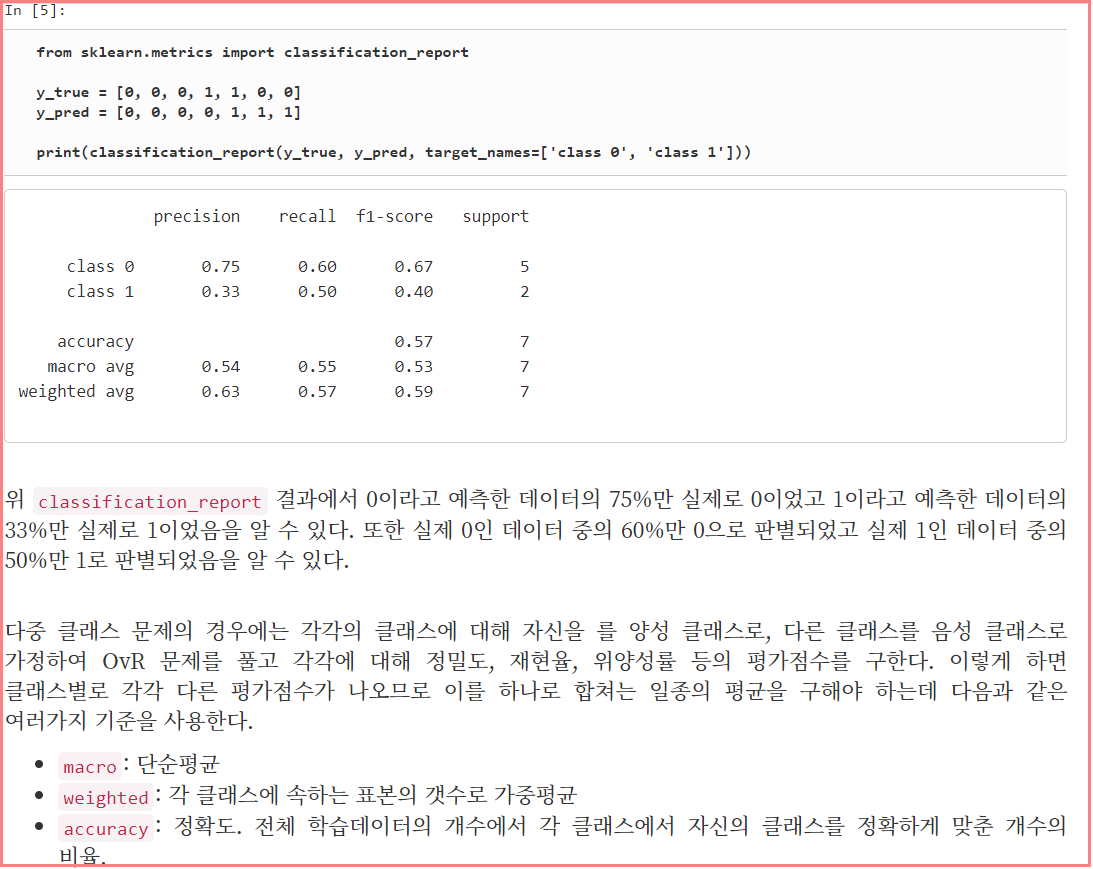

In [20]:
# 로지스틱 회귀의 threshold(임계값) 를 0이 아닌 -2로 지정해 보자 
lower_threshold = model.decision_function(X) > -2

df2 = pd.DataFrame(np.vstack([y_score, lower_threshold, y]).T,
                  columns=["y_score", "y_hat", "y"])
df2 = df2.sort_values("y_score", ascending=False).reset_index(drop=True)

In [21]:
display(df2[(df2['y_score']> -2.5) & (df2['y_score']<-1.5)])

,y_score,y_hat,y
52,-1.745360,1.0,0.0
53,-1.769197,1.0,0.0
54,-2.131581,0.0,0.0
55,-2.188715,0.0,0.0
56,-2.215620,0.0,0.0


In [22]:
print(confusion_matrix(y, lower_threshold))

[[46  4]
 [ 0 50]]


In [23]:
print(classification_report(y, lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        50
           1       0.93      1.00      0.96        50

   micro avg       0.96      0.96      0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100

